- 연예인 100장 웜쿨이 어떤 차이가 있을지 RGB의 분포를 시각화로 확인하기

# 1. Skin Detection 평균값 확인하기

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import glob
from PIL import Image

In [2]:
def Skin_Detection(img_path):

  #Open a simple image
  img=cv2.imread(img_path)

  #converting from gbr to YCbCr color space
  img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
  #skin color range for hsv color space
  YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
  YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

  YCrCb_result = cv2.bitwise_not(YCrCb_mask)
  YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

  return img_YCrCb, YCrCb_mask

In [3]:
# skin 좌표 추출, YCrCb 픽셀값 추출
def coordinate_extraction(mask, img):
  skin = np.argwhere(mask == 255) # mask의 픽셀값이 255인 skin부분의 좌표 추출

  pixel_values = [] # YCbCr 픽셀값 저장을 위한 리스트

  for index in skin:
    y, x = index  #일반적으로 생각하는 가로 x, 세로 y로 표현하기 위해 위치 바꿈
    #print(f"x: {x}, y: {y}") # skin 범위 좌표값 출력(스압주의)
    pixel_value = img[y, x]
    pixel_values.append(pixel_value)

  for coord, pixel_value in zip(skin, pixel_values): # skin부분의 좌표값과 픽셀값 출력을 위한 함수
    x, y = coord
    #print(f"Coordinate: ({x}, {y}), Pixel Value: {pixel_value}")

  return pixel_values

In [4]:
# 픽셀의 평균값 구하기
def pixel_means(pixel_values):
  # 열 별로 원소들을 더하기
  column_sums = np.sum(pixel_values, axis=0)

  # pixel_values를 NumPy 배열로 변환
  pixel_values = np.array(pixel_values)

  # 열 별로 평균 계산하기
  column_means = column_sums / pixel_values.shape[0]

  return column_means

In [5]:
def get_dict(dir_path):
  file_list = os.listdir(dir_path)

  img_list = []
  result_list = []

  for file in file_list:
    img_path = os.path.join(dir_path, file)
    if os.path.isdir(img_path):  # 만약 디렉토리인 경우, 무시하고 다음 파일로 넘어감
      continue
    img_YCrCb,YCrCb_mask = Skin_Detection(img_path)
    img_list.append([img_YCrCb, YCrCb_mask]) # 그림 show()를 위한 용도

    # YCrCb
    YCrCb_pixel_values = coordinate_extraction(YCrCb_mask, img_YCrCb)
    YCrCb_pixel_means = pixel_means(YCrCb_pixel_values)
    #print(YCrCb_pixel_means)

    result_list.append(YCrCb_pixel_means)

  # array로 변환
  result_array = np.array(result_list)

  return result_array

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path = "/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/prototype/쿨톤_jpg"  # 디렉토리 경로
path2 = "/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/prototype/웜톤_jpg"  # 디렉토리 경로

In [8]:
cool_result  = get_dict(path) # 1분

In [9]:
warm_result  = get_dict(path2) # 1분

In [11]:
print(cool_result)
print(warm_result)

[[155.72559251 151.12779924 112.494762  ]
 [165.81662472 144.65676191 115.54843593]
 [145.59138732 146.65065698 107.2598193 ]
 [168.20082116 145.62517541 109.64396341]
 [101.97185334 146.26868916 114.76099822]
 [171.64983901 148.33072949 108.73986977]
 [128.83626305 150.33711055 119.27080698]
 [175.48531131 143.36219107 115.98702477]
 [156.9106861  150.63747678 116.23058877]
 [156.61996777 148.08137571 112.5192999 ]
 [158.88334281 146.74857701 107.21617446]
 [133.46779793 143.88026343 118.51904218]
 [145.66061564 149.93470876 109.83962186]
 [125.50924581 145.74427039 114.01134179]
 [125.75232977 146.97843485 107.78314569]
 [174.21181185 147.50676224 116.27148332]
 [126.8130796  144.86556453 115.05623753]
 [124.80142969 151.00411208 110.66429774]
 [165.63750514 144.69685881 110.72716882]
 [138.79204317 150.90867778 109.82875804]
 [ 97.24449451 141.13116689 117.16905312]
 [167.01487007 144.18981202 114.99093483]
 [162.14215817 147.04537859 115.93848368]
 [137.87047024 144.93178965 114.67

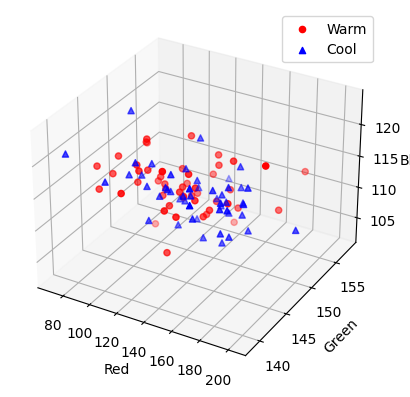

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위한 3차원 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 바나나 데이터를 빨간색으로 표시
ax.scatter(warm_result[:, 0], warm_result[:, 1], warm_result[:, 2], c='r', marker='o', label='Warm')
# 사과 데이터를 파란색으로 표시
ax.scatter(cool_result[:, 0], cool_result[:, 1], cool_result[:, 2], c='b', marker='^', label='Cool')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

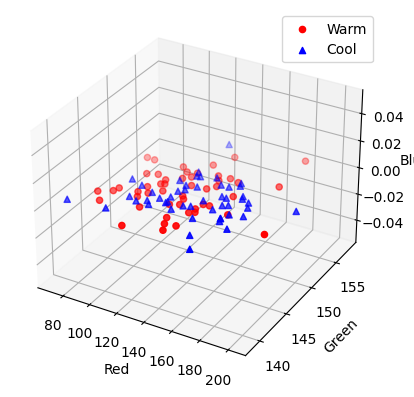

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위한 3차원 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 바나나 데이터를 빨간색으로 표시
ax.scatter(warm_result[:, 0], warm_result[:, 1], c='r', marker='o', label='Warm')
# 사과 데이터를 파란색으로 표시
ax.scatter(cool_result[:, 0], cool_result[:, 1], c='b', marker='^', label='Cool')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

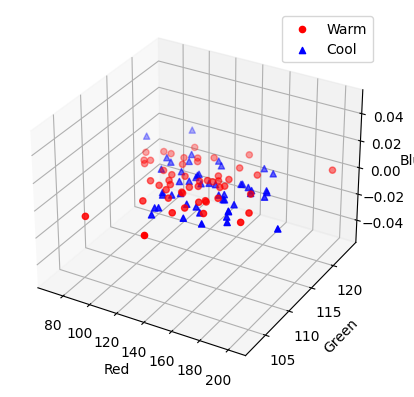

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위한 3차원 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 바나나 데이터를 빨간색으로 표시
ax.scatter(warm_result[:, 0], warm_result[:, 2], c='r', marker='o', label='Warm')
# 사과 데이터를 파란색으로 표시
ax.scatter(cool_result[:, 0], cool_result[:, 2], c='b', marker='^', label='Cool')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

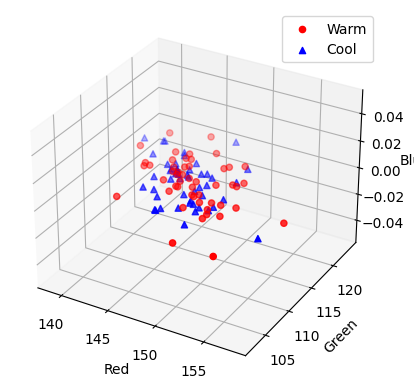

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위한 3차원 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 바나나 데이터를 빨간색으로 표시
ax.scatter(warm_result[:, 1], warm_result[:, 2], c='r', marker='o', label='Warm')
# 사과 데이터를 파란색으로 표시
ax.scatter(cool_result[:, 1], cool_result[:, 2], c='b', marker='^', label='Cool')

# 축 레이블 설정
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

- 음...정말 노답이라는 것을 알 수가 있다!

# 2. 양쪽 볼 삼각형 영역 평균값 확인하기
- 시도하려고 하였으나 이건 나중에 오류 해결해보도록 할 예정

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2 as cv
import warnings
from collections import OrderedDict
import dlib
import imutils
import matplotlib

In [17]:
warnings.filterwarnings(action='ignore')

In [18]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat" "/content/shape_predictor_68_face_landmarks.dat"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat': No such file or directory


In [19]:
def cheek(img) :
    CHEEK_IDXS = OrderedDict([("left_cheek", (1, 2, 3, 4, 5, 48, 31)),
                            ("right_cheek", (11, 12, 13, 14, 15, 35, 54))
                            ])

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    img = imutils.resize(img, width=600)

    overlay = img.copy()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    bounding_rects = []
    detections = detector(gray, 0)
    for k, d in enumerate(detections):
        shape = predictor(gray, d)
        for (_, name) in enumerate(CHEEK_IDXS.keys()):
            pts = np.zeros((len(CHEEK_IDXS[name]), 2), np.int32)
            for i, j in enumerate(CHEEK_IDXS[name]):
                pts[i] = [shape.part(j).x, shape.part(j).y]
            pts = pts.reshape((-1, 1, 2))
            cv.drawContours(overlay, [pts], -1, (255, 255, 255), -1, cv.LINE_AA)
            bounding_rects.append(cv.boundingRect(pts))
    height, width=overlay.shape[:2]

    for y in range(0, height):
        for x in range(0, width):
            b=overlay.item(y, x, 0)
            g=overlay.item(y, x, 1)
            r=overlay.item(y, x, 2)
            if b==255 and g==255 and r==255:
                continue
            overlay.itemset(y, x, 0, 0)
            overlay.itemset(y, x, 1, 0)
            overlay.itemset(y, x, 2, 0)
    output = 0
    output=cv.bitwise_and(img, overlay, output)
    black=0
    for y in range(0, height):
        for x in range(0, width):
            b=output.item(y, x, 0)
            g=output.item(y, x, 1)
            r=output.item(y, x, 2)
            if b==0 and g==0 and r==0:
                black+=1
            if b==255 and g==255 and r==255:
                output.itemset(y, x, 0, 0)
                output.itemset(y, x, 1, 0)
                output.itemset(y, x, 2, 0)
    if black > height*width-10 : return img
    return output


In [20]:
class Color :
    person_HSV = []

    def color_classifier(self, person_HSV) :
        self.H = float(person_HSV[0])
        self.S = float(person_HSV[1])
        self.V = float(person_HSV[2])
        diff = round(self.V - self.S, 2)
        print(self.H, diff)
        if self.H >= 20 and self.H <= 210 :
            if diff >= 68.25 :
                    self.ans = 0
                    # Spring
            elif diff < 68.25:
                    self.ans = 1
                    # Autumn
        elif (self.H >= 0 and self.H < 20) or (self.H > 210 and self.H < 360) :
            if diff >= 68.75 :
                    self.ans = 2
                    # Summer
            elif diff < 68.75:
                    self.ans = 3
                    # Winter

        else :
            self.ans = -1
            # 에러

        return self.ans

In [21]:
def color_ratio(clt) :
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

In [27]:
def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

In [22]:
def skin_detector(img, file_name) :
    lower = np.array([0, 48, 80], dtype = "uint8")
    upper = np.array([20, 255, 255], dtype = "uint8")

    converted = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    skinMask = cv.inRange(converted, lower, upper)

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11,11))
    skinMask = cv.erode(skinMask, kernel, iterations = 2)
    skinMask = cv.dilate(skinMask, kernel, iterations = 2)

    skinMask = cv.GaussianBlur(skinMask, (3,3), 0)
    skin = cv.bitwise_and(img, img, mask = skinMask)

    result = skin
    img = cv.cvtColor(result, cv.COLOR_BGR2HLS)
    skin_img = img
    temp_img = cv.cvtColor(img, cv.COLOR_HLS2RGB)

    h, w, c = img.shape

    for i in range(h) :
        for j in range(w) :
            H = img[i][j][0]
            L = img[i][j][1]
            S = img[i][j][2]

            R = temp_img[i][j][0]
            G = temp_img[i][j][1]
            B = temp_img[i][j][2]

            if R==0 and G==0 and B==0:
                continue

            LS_ratio = L/S
            skin_pixel = bool((S>=50) and (LS_ratio > 0.5) and (LS_ratio < 3.0) and ((H <= 25) or (H >= 165)))
            temp_pixel = bool((R == G) and (G == B) and (R >= 220))

            if skin_pixel :
                if temp_pixel :
                    skin_img[i][j][0] = 0
                    skin_img[i][j][1] = 0
                    skin_img[i][j][2] = 0
                else :
                    pass
            else :
                skin_img[i][j][0] = 0
                skin_img[i][j][1] = 0
                skin_img[i][j][2] = 0

    skin_img = cv.cvtColor(skin_img, cv.COLOR_HLS2BGR)
    for i in range(h) :
        for j in range(w) :
            B = skin_img[i][j][0]
            G = skin_img[i][j][1]
            R = skin_img[i][j][2]

            bg_pixel = bool(B==0 and G==0 and R==0)

            if bg_pixel :
                skin_img[i][j][0] = 255
                skin_img[i][j][1] = 255
                skin_img[i][j][2] = 255
            else :
                pass

    cvt_img = cv.cvtColor(skin_img, cv.COLOR_BGR2RGB)
    cvt_img = cvt_img.reshape((cvt_img.shape[0]*cvt_img.shape[1], 3))
    k = 20
    clt = KMeans(n_clusters=k)
    clt.fit(cvt_img)


    hist = color_ratio(clt)
    temp = np.array(clt.cluster_centers_)

    del_index = hist.argmax()
    hist = np.delete(hist, del_index)
    temp = np.delete(temp, del_index, 0)


    try :
        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)

        del_index = np.argmin(hist)
        hist = np.delete(hist, del_index)
        temp = np.delete(temp, del_index, 0)
    except ValueError :
        print(file_name, "에러")
        pass

    hist = hist / hist.sum()
    bar = plot_colors(hist, temp)

    bar = cv.cvtColor(bar, cv.COLOR_BGR2RGB)

    return bar

In [23]:
def color_convert2(cheek):
    img=cheek
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    R = []
    G = []
    B = []
    for i in img :
        for j in i :
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])

    R_sum = 0
    G_sum = 0
    B_sum = 0

    # 각 R, G, B의 합계 구하기
    for i in range(len(R)) :
        R_sum += R[i]
        G_sum += G[i]
        B_sum += B[i]

    R_avg = int(round((R_sum / len(R)), 0))  # R값 평균
    G_avg = int(round((G_sum / len(G)), 0))  # G값 평균
    B_avg = int(round((B_sum / len(B)), 0))  # B값 평균

    img_avg = img

    for i in img_avg :
        for j in i :
            j[0] = R_avg
            j[1] = G_avg
            j[2] = B_avg

    bgr_img_avg = cv.cvtColor(img_avg, cv.COLOR_RGB2BGR)
    bgr_img_avg=cv.resize(bgr_img_avg, (50, 50))
    return bgr_img_avg

In [24]:
def color_convert(cheek) :
    img=cheek
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    sum = 0
    R = []
    G = []
    B = []
    for i in img :
        for j in i :
            R.append(j[0])
            G.append(j[1])
            B.append(j[2])

    R_sum = 0
    G_sum = 0
    B_sum = 0

    # 각 R, G, B의 합계 구하기
    for i in range(len(R)) :
        R_sum += R[i]
        G_sum += G[i]
        B_sum += B[i]

    R_avg = int(round((R_sum / len(R)), 0))  # R값 평균
    G_avg = int(round((G_sum / len(G)), 0))  # G값 평균
    B_avg = int(round((B_sum / len(B)), 0))  # B값 평균
    RGB_color = [R_avg, G_avg, B_avg]

    arr_RGB_color = np.array(RGB_color)
    float_arr_RGB_color = arr_RGB_color / 255
    float_tp_RGB_color = tuple(float_arr_RGB_color)
    HSV_color = matplotlib.colors.rgb_to_hsv(float_tp_RGB_color)
    HSV_color2 = np.array([round(HSV_color[0]*359, 3), round(HSV_color[1] * 100, 3)-4, round(HSV_color[2] * 100, 3)+8])
    HSV_color2 = list(HSV_color2)
    HSV_color2[0] = round(HSV_color2[0], 2)
    HSV_color2[1] = round(HSV_color2[1], 2)
    HSV_color2[2] = round(HSV_color2[2], 2)
    return HSV_color2


In [28]:
def save_img(file_name, skin_type) :

    if skin_type == 0 :
        print("spring")
    elif skin_type == 1:
        print("autumn")
    elif skin_type == 2:
        print("summer")
    elif skin_type == 3:
        print("winter")
    elif skin_type == -1:
        print("")
        print(file_name, "에러")


img = cv.imread("/content/drive/MyDrive/four_seasons/사계절_연예인 이미지 데이터셋/train data/F0001_IND_D_18_0_05.JPG") # 퍼스널컬러 알고싶은 사진
file_name="personal"
cheekimg = cheek(img)
cv.imwrite("cheek.JPG", cheekimg)
bar = skin_detector(cheekimg, file_name)
cv.imwrite("bar.JPG", bar)
bgr = color_convert2(bar)
hsv = color_convert(bar)

color_class = Color()
skin_type = color_class.color_classifier(hsv)
cv.imwrite("skin.JPG", bgr)
save_img(file_name, skin_type)

RuntimeError: ignored

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt

# 피부 이미지 불러오기
cheek_image = cv.imread("cheek.JPG")

# 이미지를 RGB로 변환 (OpenCV는 BGR을 사용)
cheek_image_rgb = cv.cvtColor(cheek_image, cv.COLOR_BGR2RGB)

# 이미지 시각화
plt.imshow(cheek_image_rgb)
plt.axis("off")  # 축 제거
plt.title("Extracted Skin Image")
plt.show()

error: ignored

In [ ]:
import os
import cv2 as cv

def save_img(file_name, skin_type) :

    if skin_type == 0 :
        print("spring")
    elif skin_type == 1:
        print("autumn")
    elif skin_type == 2:
        print("summer")
    elif skin_type == 3:
        print("winter")
    elif skin_type == -1:
        print("")
        print(file_name, "에러")

# 폴더 경로 지정
folder_path = "/content/drive/MyDrive/사계절_연예인 이미지 데이터셋/train data/"

# 폴더 내의 모든 파일을 가져오기 위해 glob 사용
import glob
file_list = glob.glob(folder_path + "*.JPG")

for file_path in file_list:
    # 파일명 추출 (확장자 제외)
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    # 이미지 불러오기
    img = cv.imread(file_path)
    file_name="personal"
    cheekimg = cheek(img)
    cv.imwrite("cheek.JPG", cheekimg)
    bar = skin_detector(cheekimg, file_name)
    cv.imwrite("bar.JPG", bar)
    bgr = color_convert2(bar)
    hsv = color_convert(bar)

    color_class = Color()
    skin_type = color_class.color_classifier(hsv)
    cv.imwrite("skin.JPG", bgr)

      # save_img 함수 호출
    save_img(file_name, skin_type)